In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [2]:
df = pd.read_csv(r"C:\Users\BR- PROCUREMENT\Downloads\customer_shopping_data.csv\customer_shopping_data.csv")
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [50]:
#df.drop_duplicates() #no duplicates

In [52]:
#df.isnull() #no missing values

In [7]:
df.nunique()

invoice_no        99457
customer_id       99457
gender                2
age                  52
category              8
quantity              5
price                40
payment_method        3
invoice_date        797
shopping_mall        10
dtype: int64

In [9]:
# change invoice_date to datetime
df['invoice_date'] = pd.to_datetime(df['invoice_date'],dayfirst=True, errors='coerce')
print(df.dtypes)

invoice_no                object
customer_id               object
gender                    object
age                        int64
category                  object
quantity                   int64
price                    float64
payment_method            object
invoice_date      datetime64[ns]
shopping_mall             object
dtype: object


# EDA

In [11]:
df.describe() # for numerical columns

,age,quantity,price,invoice_date
count,99457.000000,99457.000000,99457.000000,99457
mean,43.427089,3.003429,689.256321,2022-02-04 02:46:59.783424
min,18.000000,1.000000,5.230000,2021-01-01 00:00:00
25%,30.000000,2.000000,45.450000,2021-07-19 00:00:00
50%,43.000000,3.000000,203.300000,2022-02-05 00:00:00
75%,56.000000,4.000000,1200.320000,2022-08-22 00:00:00
max,69.000000,5.000000,5250.000000,2023-03-08 00:00:00
std,14.990054,1.413025,941.184567,NaN


In [13]:
df.describe(include='object') # for object columns

,invoice_no,customer_id,gender,category,payment_method,shopping_mall
count,99457,99457,99457,99457,99457,99457
unique,99457,99457,2,8,3,10
top,I138884,C241288,Female,Clothing,Cash,Mall of Istanbul
freq,1,1,59482,34487,44447,19943


# Time Series Analysis

In [15]:
df['year_month'] = df['invoice_date'].dt.to_period('M')  #extracting year and month from Invoice_date

sales_trend = df.groupby(df['year_month'])['price'].sum().to_timestamp()
#sales_trend

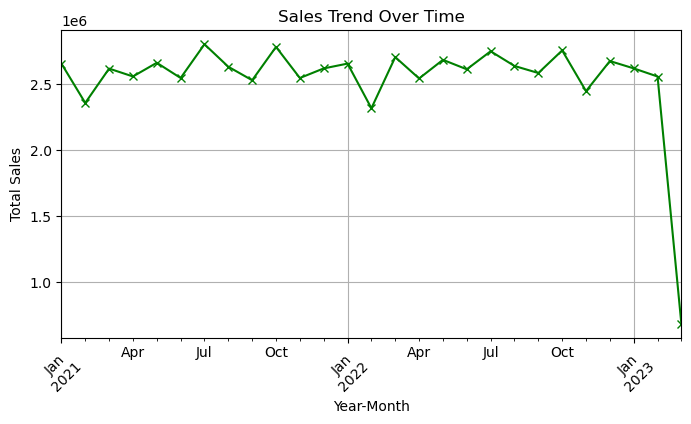

In [17]:
plt.figure(figsize=(8,4))
sales_trend.plot(kind='line', marker='x', color='green')
plt.title('Sales Trend Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [19]:
#from statsmodels.tsa.seasonal import seasonal_decompose (to break down sales data into Trend, Seasonal and Residual Components)

decomposition = seasonal_decompose(sales_trend, model='additive', period=12)
decomposition

<Figure size 640x480 with 0 Axes>

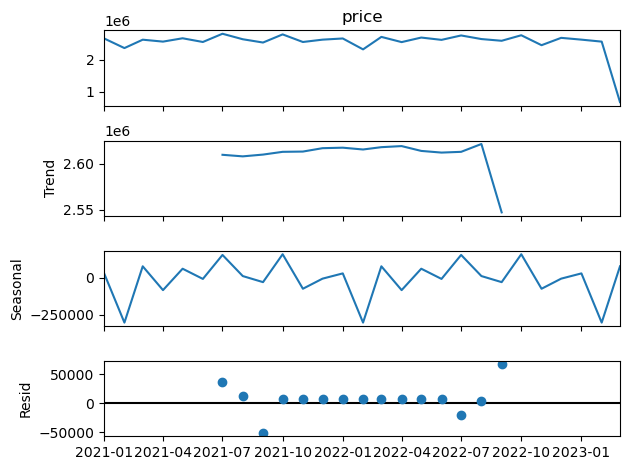

In [21]:
plt.figure(figure=(10,80))
decomposition.plot()
plt.show()
           

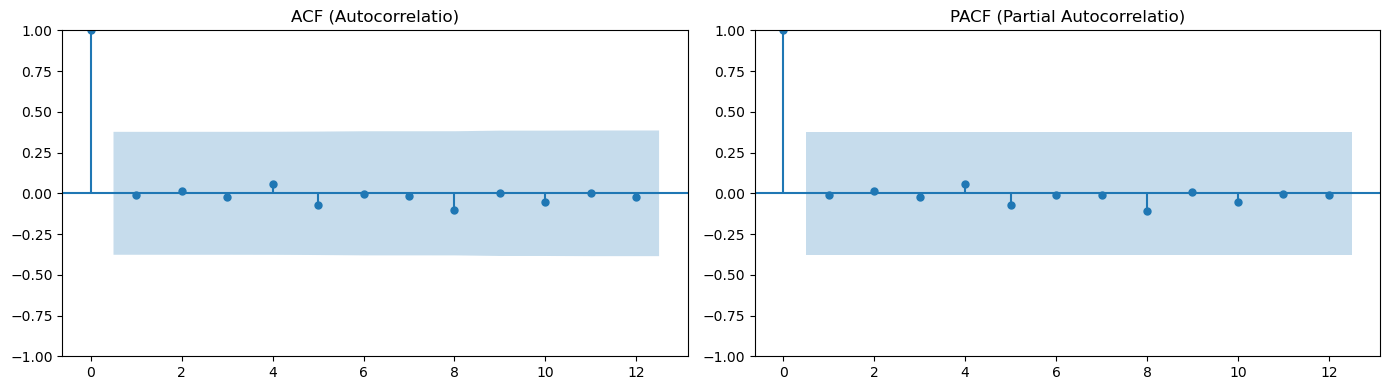

In [61]:
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf (to analize if past sales influences future sales)

fig, axes = plt.subplots(1,2, figsize=(14,4))

plot_acf(sales_trend, lags=12, ax=axes[0])
axes[0].set_title("ACF (Autocorrelatio)")

plot_pacf(sales_trend, lags=12, ax=axes[1])
axes[1].set_title("PACF (Partial Autocorrelatio)")
plt.tight_layout()
plt.show()

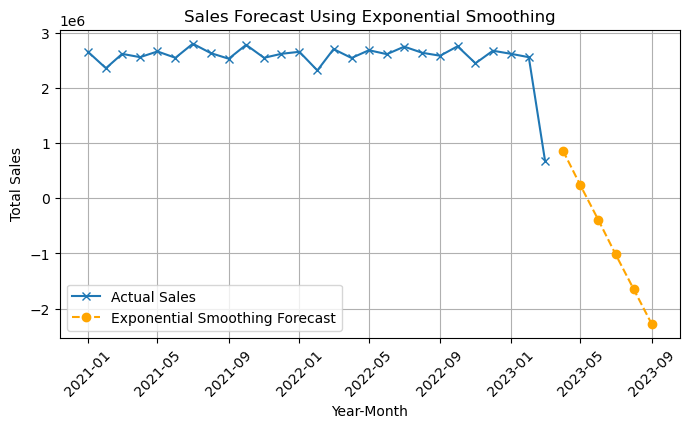

In [65]:
#from statsmodels.tsa.holtwinters import SimpleExpSmoothing (for forecasting future sales in the next 6 months)

exp_model = SimpleExpSmoothing(sales_trend).fit(smoothing_level=0.2, optimized=False)
exp_forecast = exp_model.forecast(6)


plt.figure(figsize=(8,4))
plt.plot(sales_trend, label='Actual Sales', marker='x')
plt.plot(holt_forecast, label='Exponential Smoothing Forecast', linestyle='dashed', marker='o',color='orange')
plt.title('Sales Forecast Using Exponential Smoothing')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

 # Top 10 Customers by spending and best selling Products

In [27]:
top_customers = df.groupby('customer_id')['price'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 customers by spending:\n", top_customers)


Top 10 customers by spending:
 customer_id
C596151    5250.0
C107474    5250.0
C141182    5250.0
C141193    5250.0
C630561    5250.0
C201198    5250.0
C632313    5250.0
C200860    5250.0
C200676    5250.0
C200666    5250.0
Name: price, dtype: float64


In [29]:
top_categories = df.groupby('category')['quantity'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 best selling products:\n", top_categories)


Top 10 best selling products:
 category
Clothing           103558
Cosmetics           45465
Food & Beverage     44277
Toys                30321
Shoes               30217
Technology          15021
Books               14982
Souvenir            14871
Name: quantity, dtype: int64


# Visualization

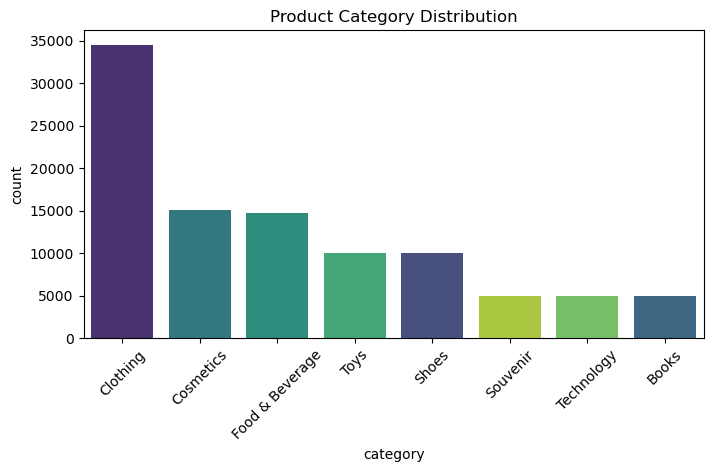

In [31]:
import seaborn as sns
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='category',hue='category',order=df['category'].value_counts().index, palette='viridis',legend=False)
plt.title('Product Category Distribution')
plt.xticks(rotation=45)
plt.show()

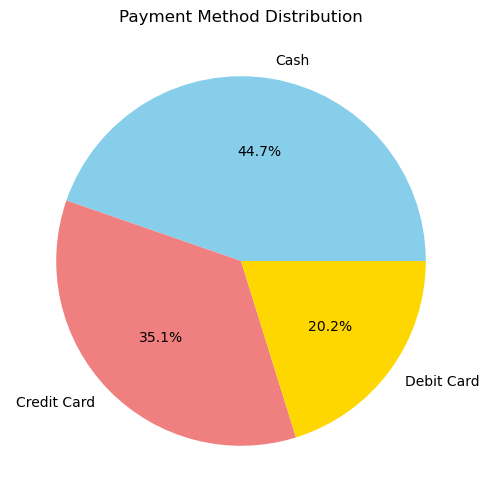

In [33]:
plt.figure(figsize=(6,6))
df['payment_method'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue','lightcoral','gold'])
plt.title('Payment Method Distribution')
plt.ylabel('')
plt.show()
          

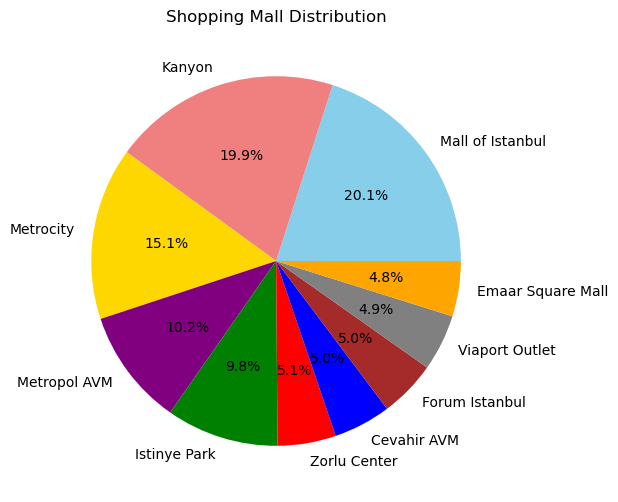

In [35]:
plt.figure(figsize=(6,6))
df['shopping_mall'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue','lightcoral','gold','purple','green','red','blue','brown','grey','orange'])
plt.title('Shopping Mall Distribution')
plt.ylabel('')
plt.show()

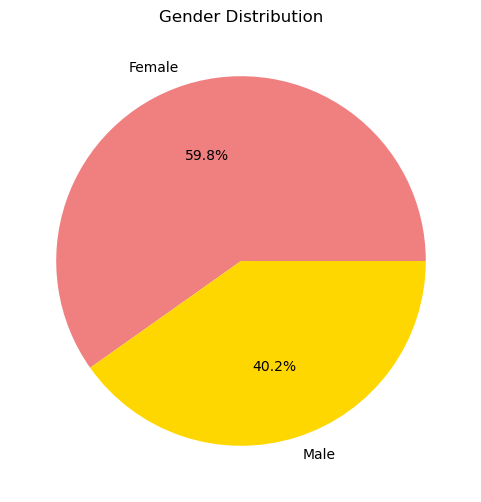

In [37]:
plt.figure(figsize=(6,6))
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral','gold'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

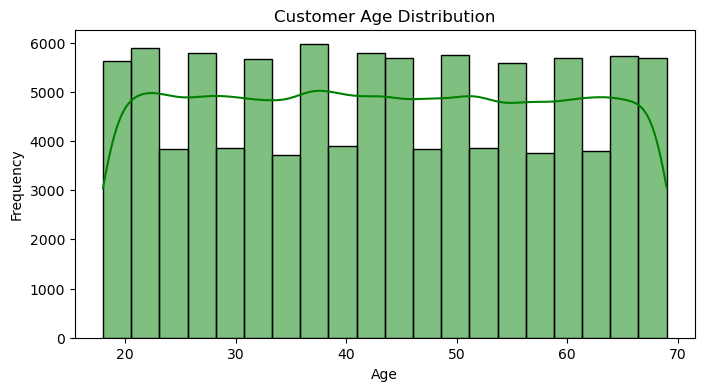

In [39]:
plt.figure(figsize=(8,4))
sns.histplot(df['age'],bins=20, kde=True,color='green')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()